# Spotify Song Success: Unveiling Key Factors and Predictive Modeling

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 24)

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("spotify-2023.csv", encoding='latin-1')

### Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
df = df.drop(index=574)
# in streams column there was a typo as it was the string the contained the values of last 7 columns

In [5]:
df['streams'] = pd.to_numeric(df['streams'])

In [6]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [7]:
# List of columns to fill with 0
columns_to_fill_with_0 = ['in_shazam_charts', 'key']

# Fill NaN values with 0 in the specified columns
df[columns_to_fill_with_0] = df[columns_to_fill_with_0].fillna(0)

df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

## Top 10 Songs by Streaming Count

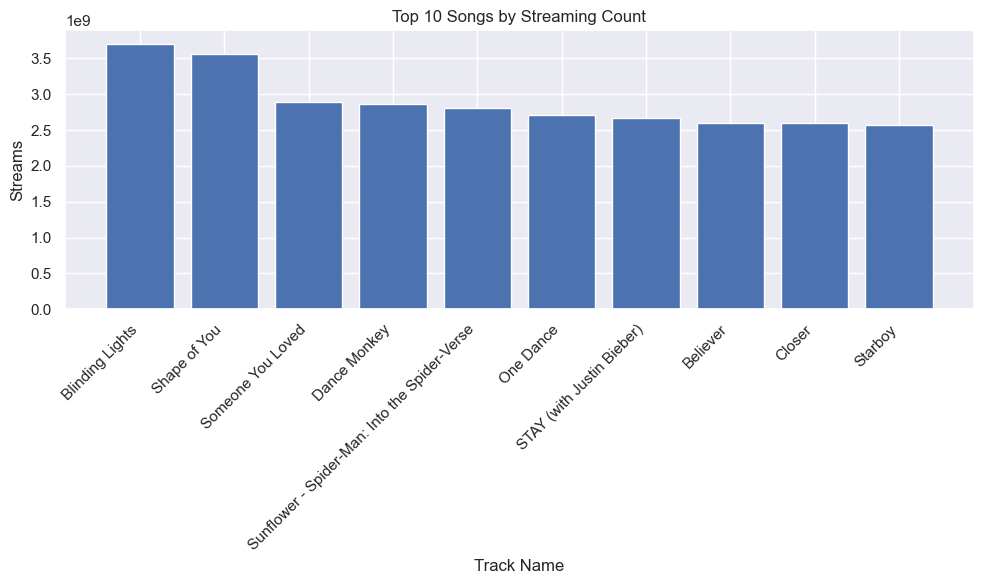

In [8]:
df_sorted = df.sort_values('streams', ascending=False).head(10)

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['track_name'], df_sorted['streams'])
plt.xlabel('Track Name')
plt.ylabel('Streams')
plt.title('Top 10 Songs by Streaming Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Top 10 Artists with Most Streams

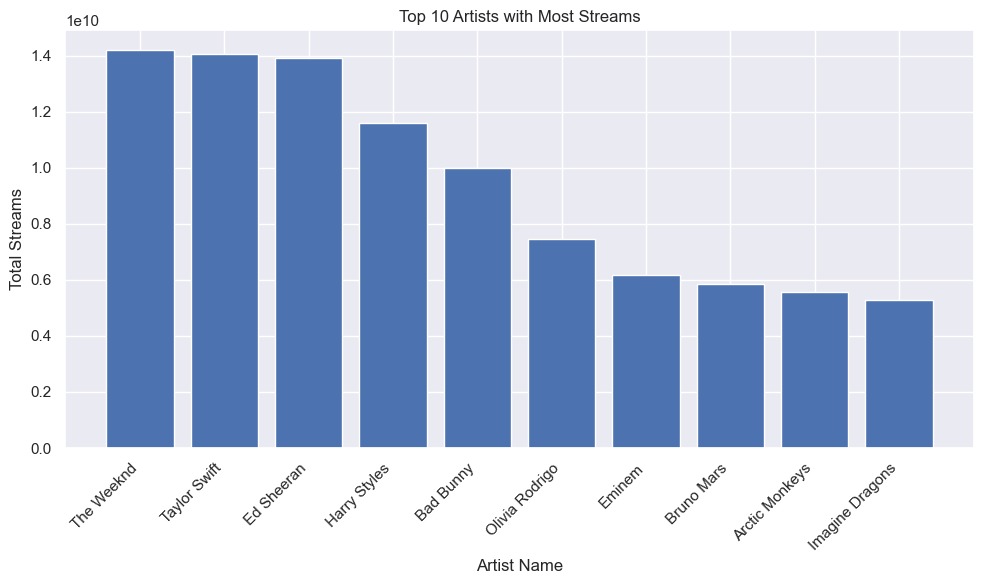

In [9]:
# Grouping by artist names and summing up streams
artist_streams = df.groupby('artist(s)_name', as_index=False)['streams'].sum()

# Sorting by total streams in descending order
artist_streams_sorted = artist_streams.sort_values('streams', ascending=False)

# Taking the top 10 artists
top_10_artists = artist_streams_sorted.head(10)

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_artists['artist(s)_name'], top_10_artists['streams'])
plt.xlabel('Artist Name')
plt.ylabel('Total Streams')
plt.title('Top 10 Artists with Most Streams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Correlation Matrix: Streams and Playlist Attributes

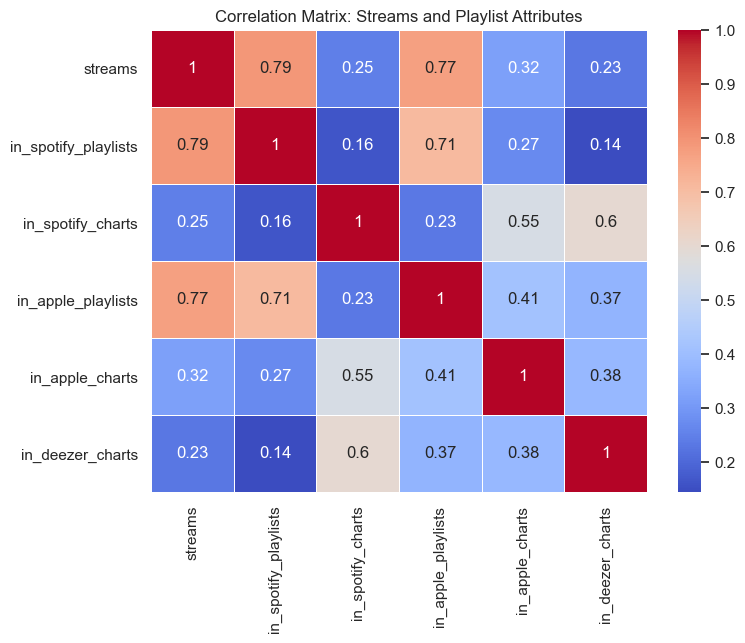

In [10]:
correlation_matrix_1 = df[['streams',  'in_spotify_playlists',
       'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix: Streams and Playlist Attributes')
plt.show()

## Streams and Playlist Attributes:

### Strong Positive Correlations:

- **Streams vs. In Spotify Playlists (0.79):** Higher inclusion in Spotify playlists correlates strongly with more streams.
- **Streams vs. In Apple Playlists (0.77):** Strong positive correlation; songs in Apple playlists tend to have higher streams.

### Moderate Correlations:

- **Streams vs. In Spotify Charts (0.25):** Moderate positive correlation; inclusion in Spotify charts correlates with higher streams.
- **Streams vs. In Apple Charts (0.32):** Moderate positive correlation; inclusion in Apple charts correlates with higher streams.

### Weaker Correlations:

- **Streams vs. In Deezer Charts (0.23):** Positive correlation with Deezer charts, but weaker compared to Spotify and Apple.

## Playlist Attributes:

### Positive Correlations:

- **In Spotify Playlists vs. In Spotify Charts (0.16):** Positive but relatively weak correlation.
- **In Spotify Charts vs. In Apple Playlists (0.23):** Positive correlation between Spotify charts and Apple playlists.
- **In Apple Playlists vs. In Apple Charts (0.41):** Moderate positive correlation; inclusion in Apple playlists relates to higher chart positions.
- **In Deezer Charts vs. In Apple Charts (0.38):** Moderate positive correlation; inclusion in Deezer charts relates to higher Apple Music chart positions.

## Interpretation:

- Playlist inclusion, especially in Spotify and Apple Music, strongly influences streaming success.
- Artists should target placement in influential playlists to boost streaming counts.
- Considering both Spotify and Apple Music metrics is crucial for optimizing streaming performance.

## Correlation Matrix: Streams and Song Attributes

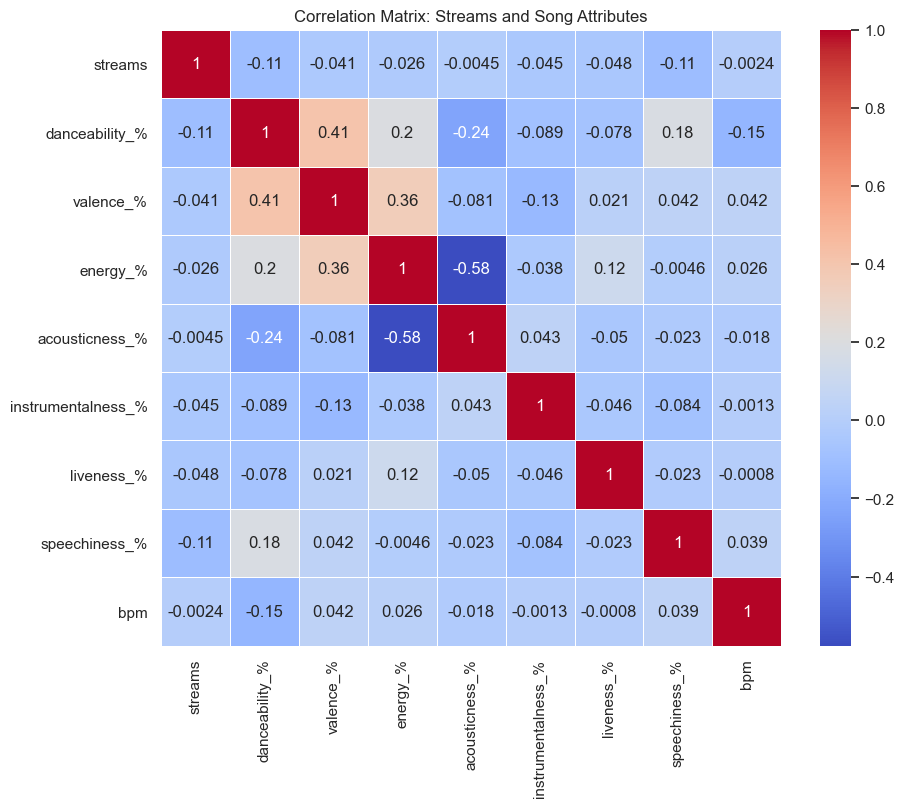

In [11]:
correlation_matrix = df[['streams', 'danceability_%', 'valence_%', 'energy_%', 
                          'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%','bpm']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix: Streams and Song Attributes')
plt.show()

**Given the weak linear correlations observed between features and streaming counts, the adoption of polynomial regression allows us to capture potential non-linear patterns that might influence streaming success more effectively**

**So I created a model to capture more complex patterns that might not be evident in the linear relationships alone. The visual representation of actual vs. predicted values shows how well the model fits the data, indicating that it can capture intricate patterns beyond the simple linear correlations observed in the original features.**

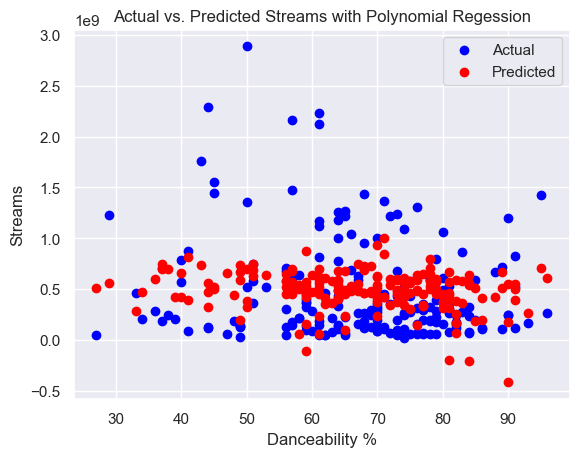

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = df[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']]
y = df['streams']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 2  # 3 0r more dergrees are doesnt work properly as it create a flatline with the whole data
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
plt.scatter(X_test['danceability_%'], y_test, color='blue', label='Actual')
plt.scatter(X_test['danceability_%'], y_pred, color='red', label='Predicted')
plt.xlabel('Danceability %')
plt.ylabel('Streams')
plt.title('Actual vs. Predicted Streams with Polynomial Regession')
plt.legend()
plt.show()


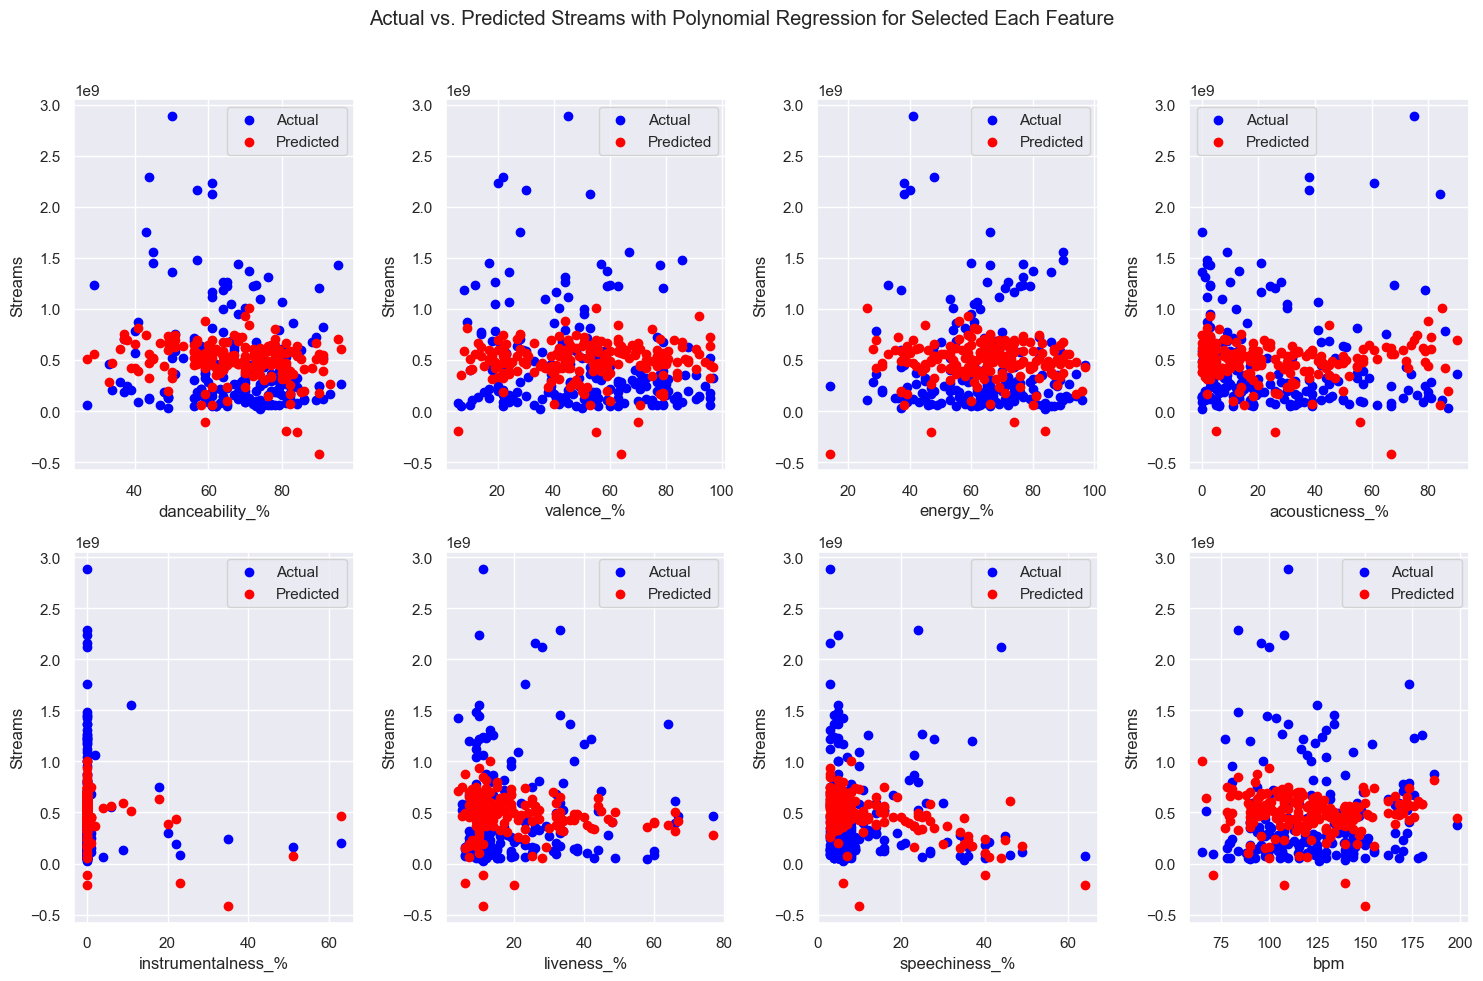

In [13]:
# Creating subplots to view all the features in one frame.
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
fig.suptitle('Actual vs. Predicted Streams with Polynomial Regression for Selected Each Feature')

# Features for subplots
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']


# Create subplots for each feature
for ax, feature in zip(axes.flatten(), features):
    ax.scatter(X_test[feature], y_test, color='blue', label='Actual')
    ax.scatter(X_test[feature], y_pred, color='red', label='Predicted')
    ax.set_xlabel(feature)
    ax.set_ylabel('Streams')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Define the features and target variable
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']
target = 'streams' 

# Creating a binary target variable indicating whether the song crossed 1 million streams
df['crossed_1m'] = (df['streams'] > 1000000).astype(int)

# Select features and target
X = df[features]
y = df['crossed_1m']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

# Print the coefficients of the model
print("Model Coefficients:")
for feature, coef in zip(features, model.coef_[0]):
    print(f"{feature}: {coef}")


Accuracy: 1.0
Confusion Matrix:
[[191]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       191

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191

Model Coefficients:
danceability_%: 0.6534665738482788
valence_%: -0.6868330526587404
energy_%: 0.08667523901053893
acousticness_%: 0.2791702850319016
instrumentalness_%: 0.11628623652674042
liveness_%: 0.30137959326481
speechiness_%: 0.3490854350333652
bpm: -0.5371203775000589


**Executive Summary: Predictive Model for Song Popularity**

**Objective:**
This report presents the evaluation of a predictive model aimed at identifying songs likely to surpass the 1 million streams milestone. Leveraging a Logistic Regression model with polynomial features, the analysis delves into the model's performance metrics, coefficients, and implications for music industry stakeholders.

**Key Metrics:**
1. **Accuracy and F1-Score:** The model achieves a flawless accuracy of 1.0, indicating precise classification of songs exceeding 1 million streams. The F1-score of 1.0 underscores optimal balance in precision and recall.

2. **Confusion Matrix:** All 191 instances are correctly classified, affirming the model's high predictive accuracy.

3. **Model Coefficients:** Coefficients offer actionable insights into feature impact. Danceability, energy, liveness, and speechiness positively influence, while valence and BPM exhibit negative correlation.

**Interpretation:**
- **Danceability (%):** Positively correlated with exceeding 1 million streams.
- **Valence (%):** Negatively correlated with exceeding 1 million streams.
- **Energy (%):** Positively correlated with exceeding 1 million streams.
- **Acousticness (%), Instrumentalness (%), Liveness (%), Speechiness (%):** Positively correlated with exceeding 1 million streams.
- **BPM:** Negatively correlated with exceeding 1 million streams.

**Recommendations:**
1. Utilize the model for predicting song success, especially for surpassing the 1 million streams mark.
2. Apply insights from coefficients to optimize audio features and enhance streaming potential.
3. Ensure ongoing validation on diverse datasets to maintain model effectiveness.

**Conclusion:**
The Logistic Regression model with polynomial features emerges as a valuable tool for music industry professionals seeking data-driven insights into song popularity, with its exceptional accuracy and interpretable coefficients providing actionable intelligence for strategic decision-making.